In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/electric-production/Electric_Production.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

In [3]:
sns.set_palette('muted')

In [4]:
df=pd.read_csv('/kaggle/input/electric-production/Electric_Production.csv')

In [5]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


#### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
df.shape

(397, 2)

In [8]:
df = df.rename(columns = {'DATE':'Date'})

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.head()

,Date,Value,Year,Month,Day
0,1985-01-01,72.5052,1985,1,1
1,1985-02-01,70.6720,1985,2,1
2,1985-03-01,62.4502,1985,3,1
3,1985-04-01,57.4714,1985,4,1
4,1985-05-01,55.3151,1985,5,1


Text(0, 0.5, 'Value')

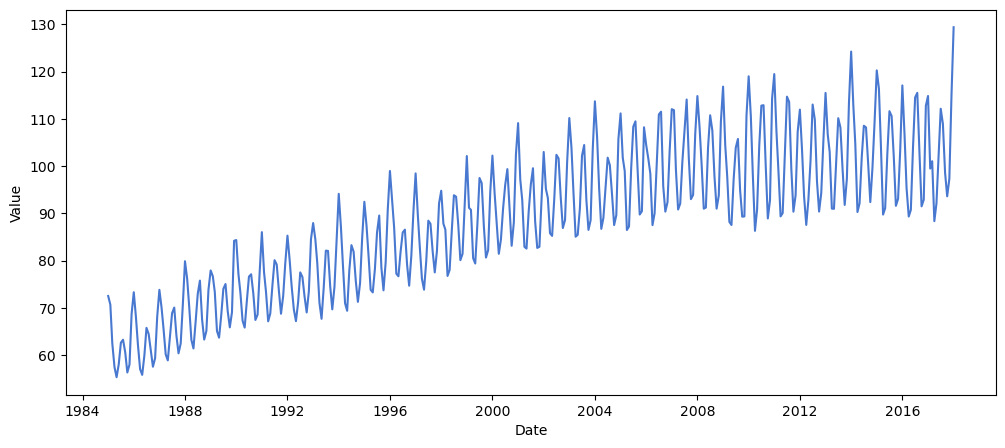

In [12]:
plt.figure(figsize=(12,5))
plt.plot('Date', 'Value', data = df)
plt.xlabel('Date')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

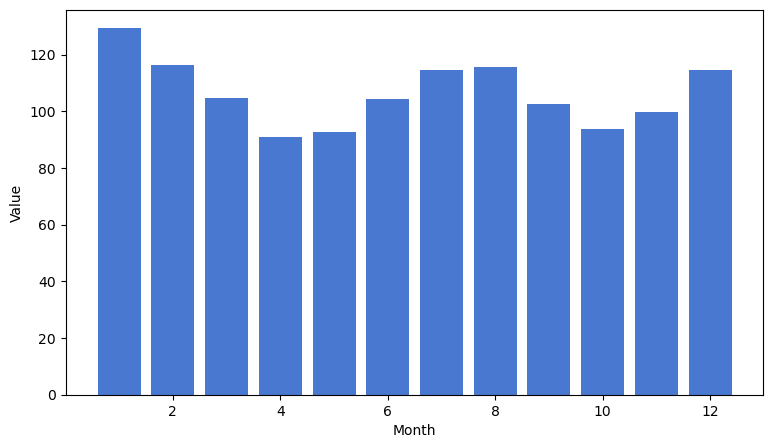

In [13]:
plt.figure(figsize=(9,5))
plt.bar('Month', 'Value', data=df)
plt.xlabel('Month')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

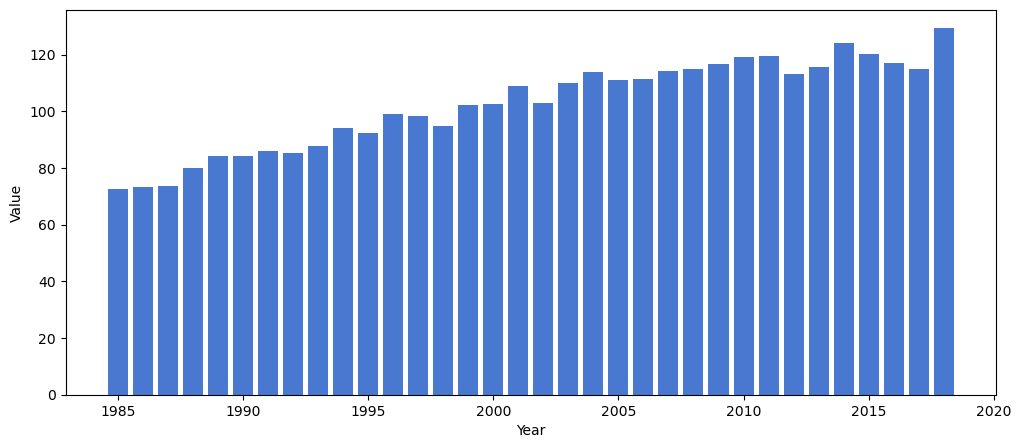

In [14]:
plt.figure(figsize=(12,5))
plt.bar('Year', 'Value', data=df)
plt.xlabel('Year')
plt.ylabel('Value')

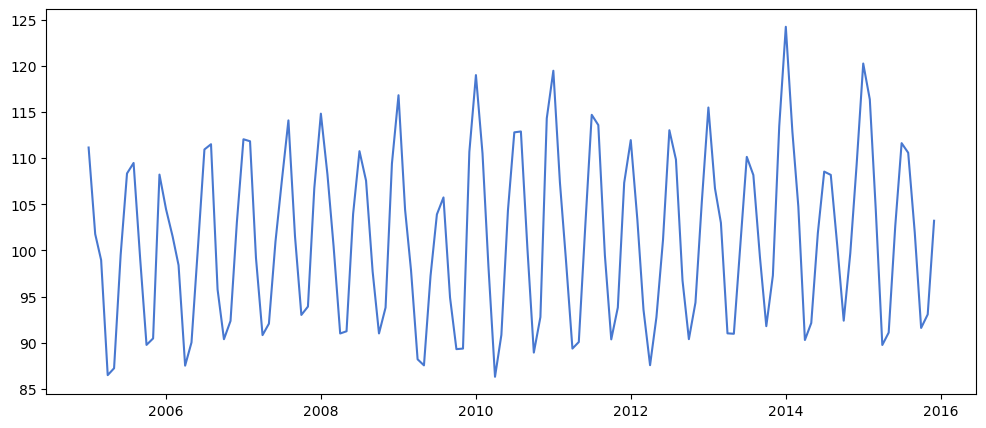

In [15]:
df_2004_2016 = df[(df['Year'] > 2004 ) & (df['Year'] < 2016)]
plt.figure(figsize=(12,5))
plt.plot('Date', 'Value', data=df_2004_2016)

In [16]:
df['Year'] = df['Year'].astype('object')
df['Month'] = df['Month'].astype('object')
df['Day'] = df['Day'].astype('object')

In [17]:
df.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

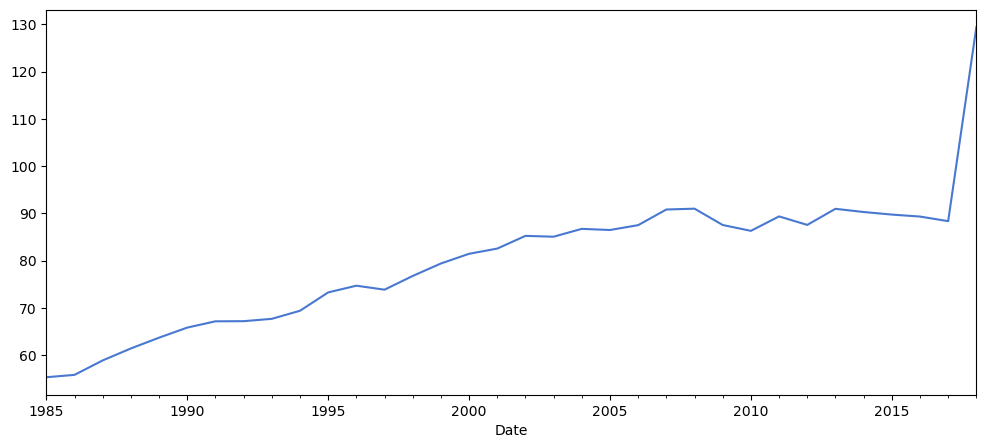

In [18]:
df.resample(rule='A').min()['Value'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

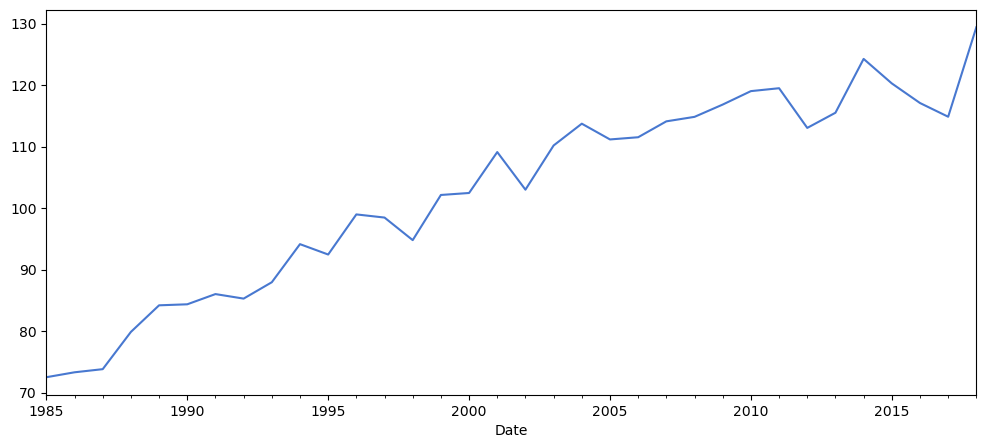

In [19]:
df.resample(rule='A').max()['Value'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

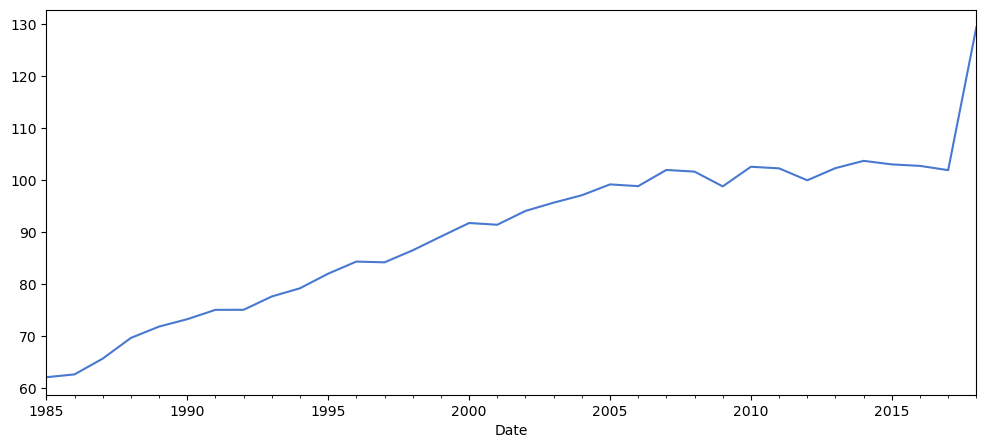

In [20]:
df.resample(rule='A').mean()['Value'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

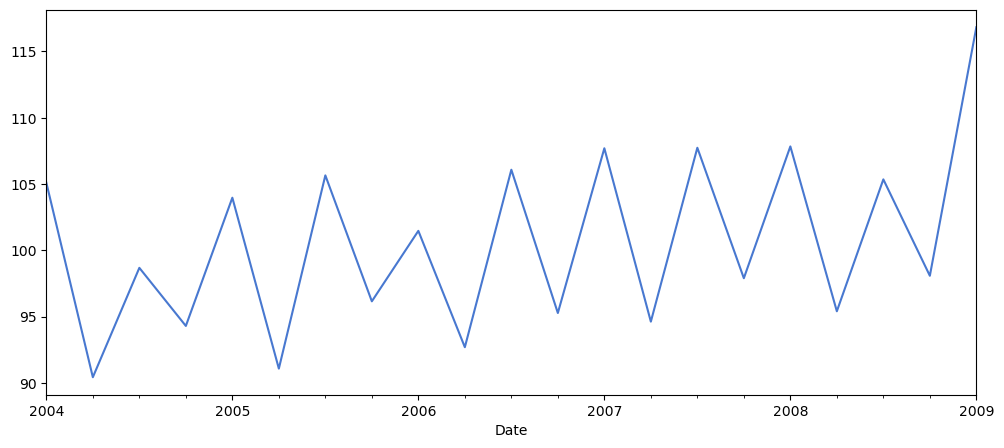

In [21]:
df.loc['2004-01-01':'2009-01-01'].resample(rule='QS').mean()['Value'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

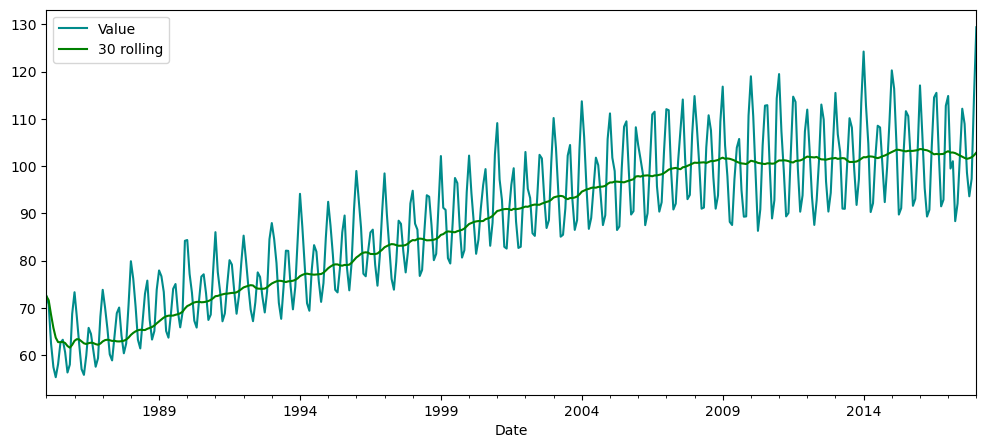

In [22]:
df['30 rolling'] = df['Value'].rolling(30, min_periods=1).mean()
df[['Value','30 rolling']].plot(figsize=(12,5), color=['darkcyan','green'])

<AxesSubplot:xlabel='Date'>

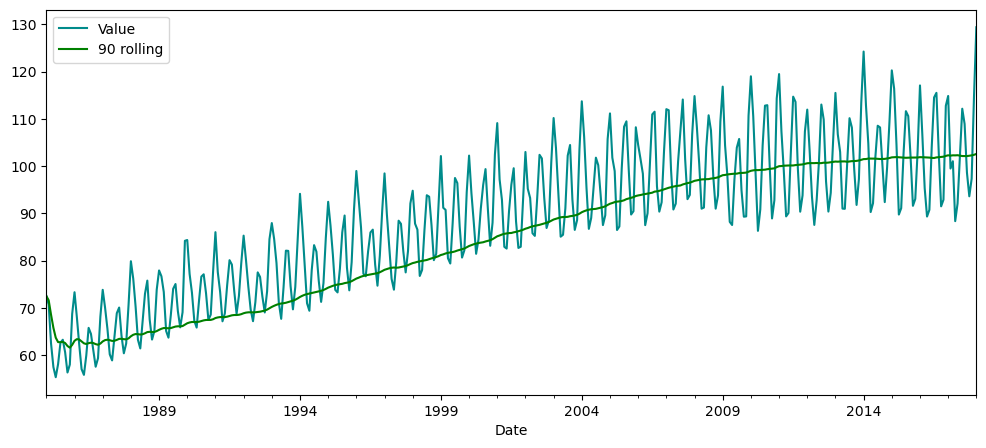

In [23]:
df['90 rolling'] = df['Value'].rolling(90,min_periods=1).mean()
df[['Value','90 rolling']].plot(figsize=(12,5), color = ['darkcyan','green'])

In [24]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:',result[0])
    print('p-value:',result[1])
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adf_test(df['Value'])

ADF Statistics: -2.256990350047225
p-value: 0.1862146911658744
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
df['Value First Diff'] = df['Value'] - df['Value'].shift(1)

In [27]:
df.head()

,Value,Year,Month,Day,30 rolling,90 rolling,Value First Diff
Date,,,,,,,
1985-01-01,72.5052,1985,1,1,72.505200,72.505200,NaN
1985-02-01,70.6720,1985,2,1,71.588600,71.588600,-1.8332
1985-03-01,62.4502,1985,3,1,68.542467,68.542467,-8.2218
1985-04-01,57.4714,1985,4,1,65.774700,65.774700,-4.9788
1985-05-01,55.3151,1985,5,1,63.682780,63.682780,-2.1563


In [28]:
adf_test(df['Value First Diff'].dropna())

ADF Statistics: -7.104890882267313
p-value: 4.0777865655394095e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

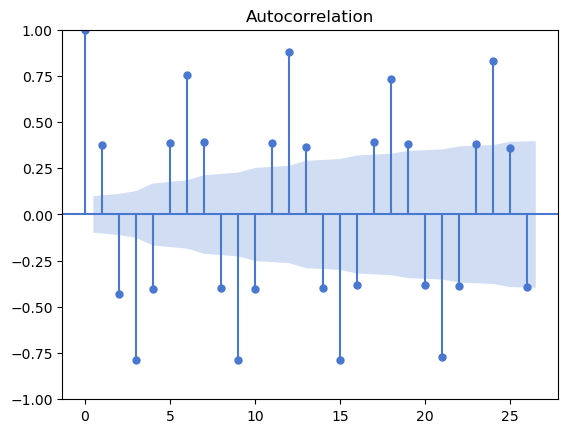

In [30]:
acf = plot_acf(df['Value First Diff'].dropna())

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


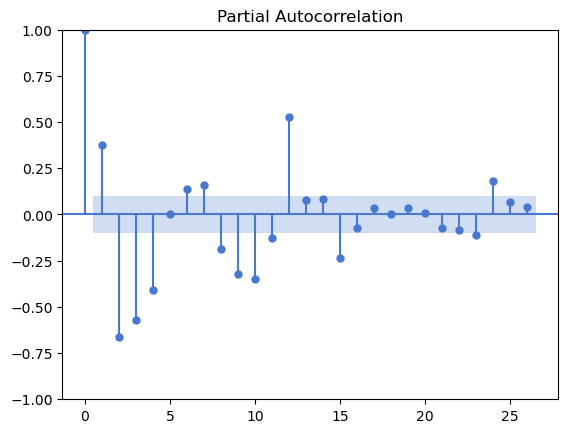

In [31]:
pacf = plot_pacf(df['Value First Diff'].dropna())

In [32]:
df

,Value,Year,Month,Day,30 rolling,90 rolling,Value First Diff
Date,,,,,,,
1985-01-01,72.5052,1985,1,1,72.505200,72.505200,NaN
1985-02-01,70.6720,1985,2,1,71.588600,71.588600,-1.8332
1985-03-01,62.4502,1985,3,1,68.542467,68.542467,-8.2218
1985-04-01,57.4714,1985,4,1,65.774700,65.774700,-4.9788
1985-05-01,55.3151,1985,5,1,63.682780,63.682780,-2.1563
...,...,...,...,...,...,...,...
2017-09-01,98.6154,2017,9,1,101.545190,102.123863,-10.3158
2017-10-01,93.6137,2017,10,1,101.674110,102.205127,-5.0017
2017-11-01,97.3359,2017,11,1,101.882207,102.277343,3.7222


In [33]:
from datetime import datetime, timedelta
train = datetime(2015,1,1)
test = datetime(2018,1,1)


In [34]:
train_data = df[:train]
test_data = df[train+timedelta(days=1):test]

In [35]:
pred_start = test_data.index[0]
pred_end = test_data.index[-1]

In [36]:
test_data

,Value,Year,Month,Day,30 rolling,90 rolling,Value First Diff
Date,,,,,,,
2015-02-01,116.3788,2015,2,1,103.207583,101.880748,-3.8908
2015-03-01,104.4706,2015,3,1,103.465167,101.913403,-11.9082
2015-04-01,89.7461,2015,4,1,103.444020,101.877173,-14.7245
2015-05-01,91.0930,2015,5,1,103.335730,101.845844,1.3469
2015-06-01,102.6495,2015,6,1,103.248307,101.800252,11.5565
2015-07-01,111.6354,2015,7,1,103.119453,101.764722,8.9859
2015-08-01,110.5925,2015,8,1,103.248070,101.790913,-1.0429
2015-09-01,101.9204,2015,9,1,103.212257,101.807378,-8.6721
2015-10-01,91.5959,2015,10,1,103.231813,101.814061,-10.3245


In [37]:
train_data

,Value,Year,Month,Day,30 rolling,90 rolling,Value First Diff
Date,,,,,,,
1985-01-01,72.5052,1985,1,1,72.505200,72.505200,NaN
1985-02-01,70.6720,1985,2,1,71.588600,71.588600,-1.8332
1985-03-01,62.4502,1985,3,1,68.542467,68.542467,-8.2218
1985-04-01,57.4714,1985,4,1,65.774700,65.774700,-4.9788
1985-05-01,55.3151,1985,5,1,63.682780,63.682780,-2.1563
...,...,...,...,...,...,...,...
2014-09-01,100.4172,2014,9,1,102.083237,101.518893,-7.7768
2014-10-01,92.3837,2014,10,1,102.244140,101.536293,-8.0335
2014-11-01,99.7033,2014,11,1,102.475573,101.621233,7.3196


In [38]:
model = sms.tsa.arima.ARIMA(train_data['Value'],order=(5,1,3))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
model_fit = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  361
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -933.435
Date:                Mon, 20 Mar 2023   AIC                           1884.869
Time:                        08:10:19   BIC                           1919.844
Sample:                    01-01-1985   HQIC                          1898.776
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7404      0.056     31.136      0.000       1.631       1.850
ar.L2         -1.7552      0.106    -16.516      0.000      -1.964      -1.547
ar.L3          1.0096      0.126      8.004      0.000       0.762       1.257
ar.L4         -0.2671      0.102     -2.617      0.009      -0.467      -0.067
ar.L5          0.2522      0.056      4.514      0.000       0.143       0.362
ma.L1         -1.9290      0.049    -39.644      0.000      -2.024      -1.834
ma.L2          1.8913      0.052     36.537      0.000       1.790       1.993
ma.L3         -0.9613      0.047    -20.249      0.000      -1.054      -0.868
sigma2         9.8165      0.729     13.468      0.000       8.388      11.245
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.32
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
print(pred_start)
print(pred_end)

2015-02-01 00:00:00
2018-01-01 00:00:00


In [42]:
preds = model_fit.predict(start=pred_start, end=pred_end)
residuals = test_data['Value'] - preds

In [43]:
preds

2015-02-01    115.731453
2015-03-01    102.866845
2015-04-01     95.025108
2015-05-01     98.890502
2015-06-01    110.359600
2015-07-01    117.910342
2015-08-01    113.673983
2015-09-01    101.617444
2015-10-01     93.604729
2015-11-01     97.419444
2015-12-01    108.985615
2016-01-01    116.481900
2016-02-01    112.178642
2016-03-01    100.169688
2016-04-01     92.263523
2016-05-01     96.151638
2016-06-01    107.710714
2016-07-01    115.143816
2016-08-01    110.800694
2016-09-01     98.833360
2016-10-01     91.026215
2016-11-01     94.988451
2016-12-01    106.539463
2017-01-01    113.907234
2017-02-01    109.523447
2017-03-01     97.597040
2017-04-01     89.887387
2017-05-01     93.921819
2017-06-01    105.463073
2017-07-01    112.764385
2017-08-01    108.339232
2017-09-01     96.452931
2017-10-01     88.839397
2017-11-01     92.944249
2017-12-01    104.474132
2018-01-01    111.707954
Freq: MS, Name: predicted_mean, dtype: float64

In [44]:
residuals

Date
2015-02-01     0.647347
2015-03-01     1.603755
2015-04-01    -5.279008
2015-05-01    -7.797502
2015-06-01    -7.710100
2015-07-01    -6.274942
2015-08-01    -3.081483
2015-09-01     0.302956
2015-10-01    -2.008829
2015-11-01    -4.356644
2015-12-01    -5.765315
2016-01-01     0.601800
2016-02-01    -5.509842
2016-03-01    -4.814888
2016-04-01    -2.938123
2016-05-01    -5.414738
2016-06-01    -3.673214
2016-07-01    -0.604116
2016-08-01     4.715206
2016-09-01     3.930340
2016-10-01     0.460485
2016-11-01    -2.098451
2016-12-01     6.229937
2017-01-01     0.943266
2017-02-01   -10.033347
2017-03-01     3.442560
2017-04-01    -1.534387
2017-05-01    -1.841319
2017-06-01    -3.309873
2017-07-01    -0.610585
2017-08-01     0.591968
2017-09-01     2.162469
2017-10-01     4.774303
2017-11-01     4.391651
2017-12-01    10.247068
2018-01-01    17.696846
dtype: float64

<AxesSubplot:ylabel='Density'>

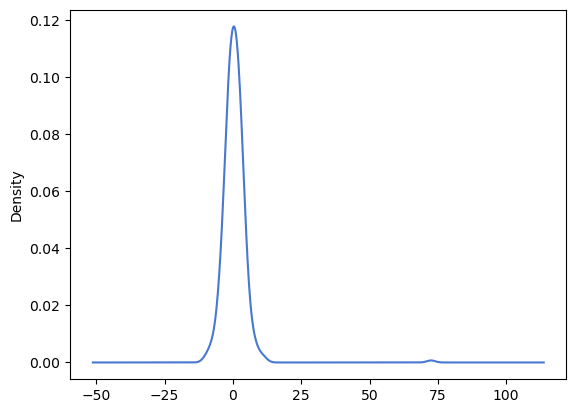

In [45]:
model_fit.resid.plot(kind='kde')

In [46]:
test_data['Prediciton'] = preds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

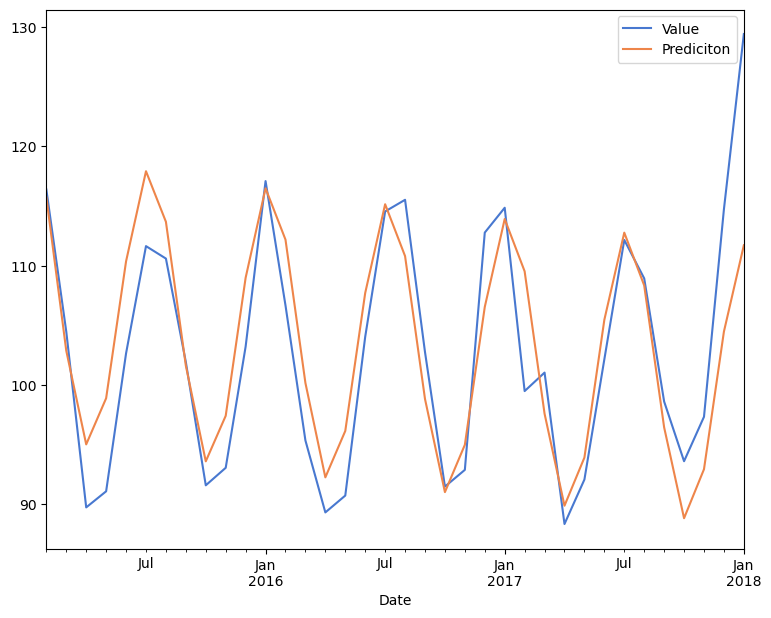

In [47]:
test_data[['Value','Prediciton']].plot(figsize=(9,7))